In [ ]:
import numpy as np
import random
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%mkdir dataset
!cp '/content/drive/MyDrive/rdr_nomap_browse.zip' dataset/
%cd dataset

/content/dataset


In [ ]:
# !cp rdr_nomap_browse.zip dataset/

In [ ]:
!unzip -q rdr_nomap_browse.zip 
%cd rdr_nomap_browse

/content/dataset/rdr_nomap_browse


In [ ]:
import os
import random
from skimage import io
from collections import Counter
import matplotlib as plt
import pandas as pd

path = '/content/dataset/rdr_nomap_browse'
data = '/content/dataset/rdr_nomap_browse/manifest.csv'
path_dusty = '/content/dataset/rdr_nomap_browse/dusty'
path_not_dusty = '/content/dataset/rdr_nomap_browse/not_dusty'

df = pd.read_csv(data)
os.listdir(path_dusty)
path

'/content/dataset/rdr_nomap_browse'

In [ ]:
df.sample(10)

,#dataset,id,label
4021,train,000585_PSP_004300_1455_r1286_c1638,dusty
6645,train,009522_ESP_022916_1420_r6_c307,not_dusty
10206,validation,005428_PSP_004509_1890_r18916_c1536,dusty
14724,validation,006599_ESP_020470_1755_r757_c102,not_dusty
7341,train,007790_PSP_001752_2650_r717_c410,not_dusty
14280,validation,005871_ESP_019874_1280_r3932_c307,not_dusty
17368,test,005337_PSP_004526_2175_r11458_c614,dusty
2618,train,008147_PSP_004424_1395_r969_c410,dusty
15451,test,005633_PSP_004457_2130_r5612_c1843,dusty
19061,test,001025_PSP_004401_2090_r1653_c1843,not_dusty


In [ ]:
Xtrain_list = []
Ytrain_list = []

for i in df.index:
  if df['#dataset'][i] == 'train' and df['label'][i] == 'not_dusty':
    Xtrain_list.append({'id':df['id'][i]})
    Ytrain_list.append({'label':df['label'][i]})

In [ ]:
Xarrhist = []

for i in df.index:
  if df['#dataset'][i] == 'train' and df['label'][i] == 'dusty':
    Xarrhist.append({'id':df['id'][i]})

hist_arr = []

curr_dir = os.getcwd()

for x in Xarrhist:
  hist_arr.append(io.imread(curr_dir + '/' + 'dusty' + '/' + x['id'] + '.png'))

In [ ]:
from skimage import io

# p = '/content/dataset/rdr_nomap_browse/not_dusty/'

Xtrain = []

curr_dir = os.getcwd()

for x in Xtrain_list:
  Xtrain.append(io.imread(curr_dir + '/' + 'not_dusty' + '/' + x['id'] + '.png'))

In [ ]:
from collections import Counter
print(len(Xtrain))

4961


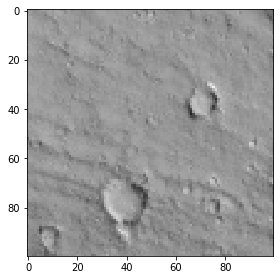

In [ ]:
io.imshow(Xtrain[4000])

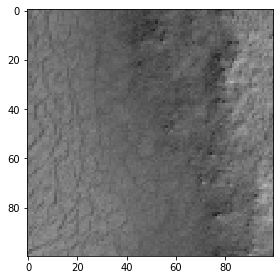

In [ ]:
io.imshow(Xtrain[1102])

In [ ]:
norm = np.max(Xtrain)-np.min(Xtrain)
for i in range(len(Xtrain)):
  Xtrain[i] = Xtrain[i]/norm

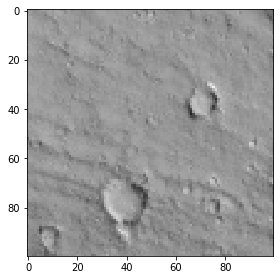

In [ ]:
io.imshow(Xtrain[4000])

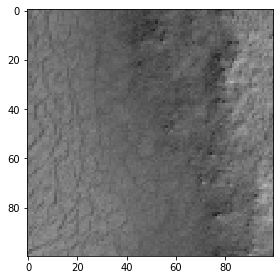

In [ ]:
io.imshow(Xtrain[1102])

In [ ]:
import random
import cv2

def add_noise_prm(img, l, h):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between l and h
	number_of_pixels = random.randint(l, h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 205-255
		img[y_coord][x_coord] = np.random.randint(175,255)
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between l and h
	number_of_pixels = random.randint(l , h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 0-50
		img[y_coord][x_coord] = np.random.randint(125,205)
		
	return img

In [ ]:
def add_noise_prm_mod(img, l, h):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between l and h
	number_of_pixels = random.randint(l, h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 145-220
		img[y_coord][x_coord] = np.random.randint(145,220)
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between l and h
	number_of_pixels = random.randint(l , h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 80-145
		img[y_coord][x_coord] = np.random.randint(80,145)
		
	return img

In [ ]:
from skimage import img_as_ubyte

NoisyX= []

for x in Xtrain:
  img = img_as_ubyte(x)
  img = add_noise_prm_mod(img,3000,4000)
  NoisyX.append(img)

In [ ]:
NoisyX[0].shape

(100, 100)

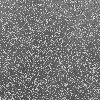

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(NoisyX[3])

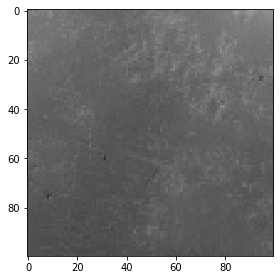

In [ ]:
io.imshow(Xtrain[3])

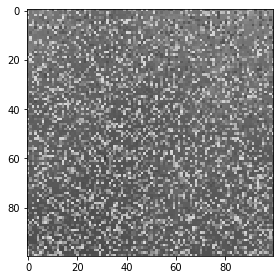

In [ ]:
io.imshow(NoisyX[3])

In [ ]:
X_train = np.array(Xtrain)
NoisyX = np.array(NoisyX)

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,1)
NoisyX = NoisyX.reshape(len(NoisyX),100,100,1)
X_train.shape

(4961, 100, 100, 1)

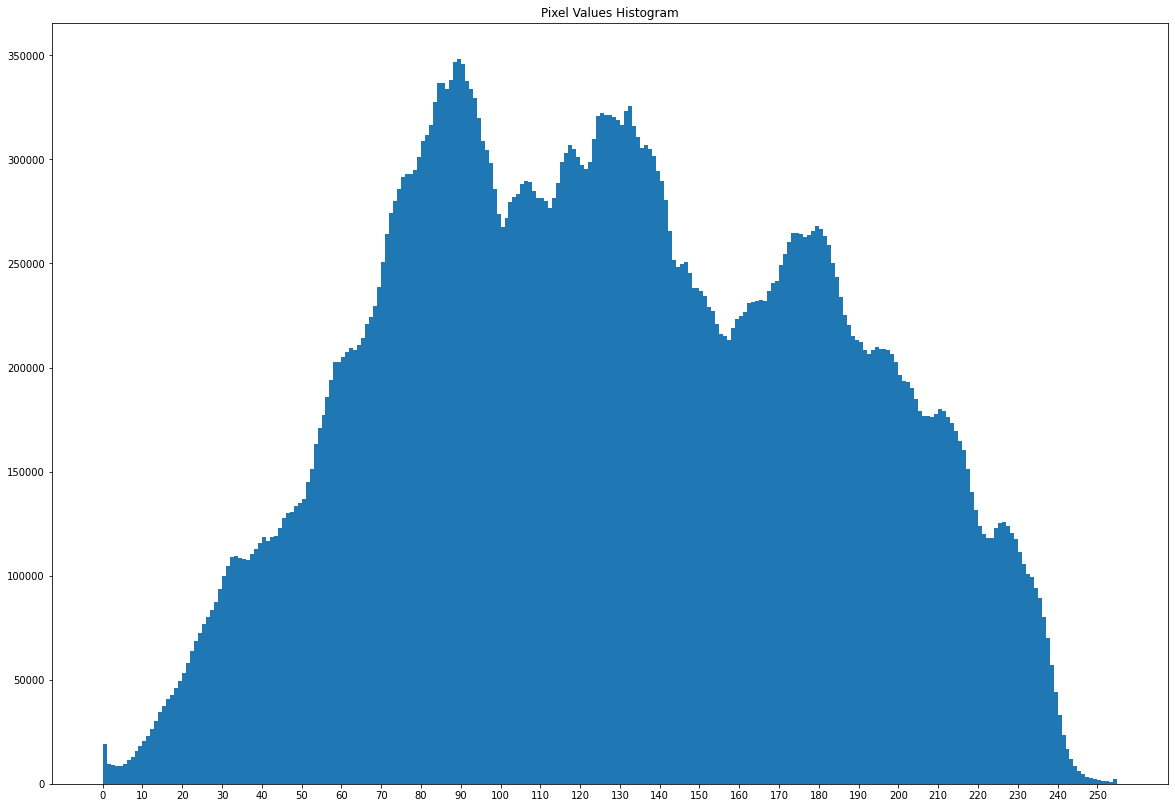

In [ ]:
import matplotlib.pyplot as plt

hist_arr = np.array(hist_arr)

c = hist_arr.flat
c = np.array(list(c))

fig = plt.figure(figsize =(20, 14))

plt.xticks(np.arange(0,255,10))
 
plt.hist(c,bins=255)
 
plt.title("Pixel Values Histogram")
 
# show plot
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
# input = layers.Input(shape=(100, 100, 1))

# # Encoder
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# # Decoder
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# # Autoencoder
# autoencoder = Model(input, x)
# autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
# autoencoder.summary()

In [ ]:
input = layers.Input(shape=(100, 100, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 50, 50, 32)       9248  

In [ ]:
autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=100,
    batch_size=64,
    shuffle=True
)

Epoch 1/100
78/78 [==============================] - 12s 46ms/step - loss: 0.6482
Epoch 2/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6205
Epoch 3/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6196
Epoch 4/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6188
Epoch 5/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6185
Epoch 6/100
78/78 [==============================] - 3s 42ms/step - loss: 0.6182
Epoch 7/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6180
Epoch 8/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6179
Epoch 9/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6178
Epoch 10/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6177
Epoch 11/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6177
Epoch 12/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6176
Epoch 13/100
78/78 [====

In [ ]:
predictions = autoencoder.predict(X_train)

156/156 [==============================] - 2s 10ms/step


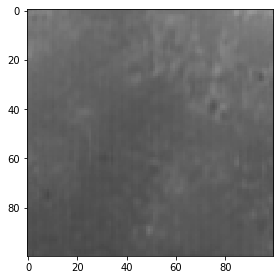

In [ ]:
preds = predictions[3].reshape(100,100)
io.imshow(preds, cmap='gray')

In [ ]:
preds.shape

(100, 100)

In [ ]:
autoencoder.fit(
    x=NoisyX,
    y=X_train,
    epochs=250,
    batch_size=64,
    shuffle=True
)

Epoch 1/250
78/78 [==============================] - 3s 40ms/step - loss: 14.0943
Epoch 2/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6880
Epoch 3/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 4/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6880
Epoch 5/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 6/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 7/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 8/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 9/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 10/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 11/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 12/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 13/250
78/78 [====

In [ ]:
predictions_n = autoencoder.predict(NoisyX)

156/156 [==============================] - 2s 10ms/step


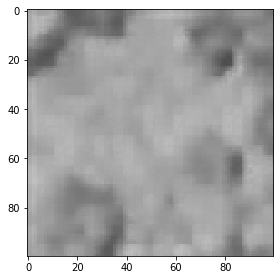

In [ ]:
preds_n = predictions_n[100].reshape(100,100)
io.imshow(preds_n,cmap='gray')

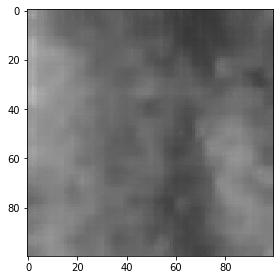

In [ ]:
# i =10 
temp = predictions_n[6].reshape(100,100)
io.imshow(temp,cmap='gray')
io.imsave('b1.png',img_as_ubyte(temp))

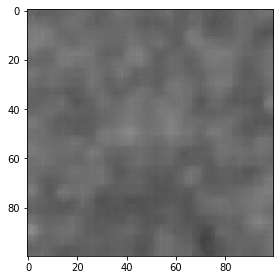

In [ ]:
from PIL import Image
pil_arr = []
for i in range(len(predictions_n)):
  v = predictions_n[i].reshape(100,100)
  io.imshow(v)
  break
  #pil_arr.append(v)

In [ ]:
from PIL import Image
pil_arr_train = []
for x in Xtrain:
  v = x.reshape(100,100)
  pil_arr_train.append(v)

In [ ]:
from PIL import Image
pil_arr_noise = []
for x in NoisyX:
  v = x.reshape(100,100)
  pil_arr_noise.append(v)

In [ ]:
pil_arr = pil_arr[0:20]
pil_arr_train = pil_arr_train[0:20]
pil_arr_Noisy = pil_arr_noise[0:20]

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


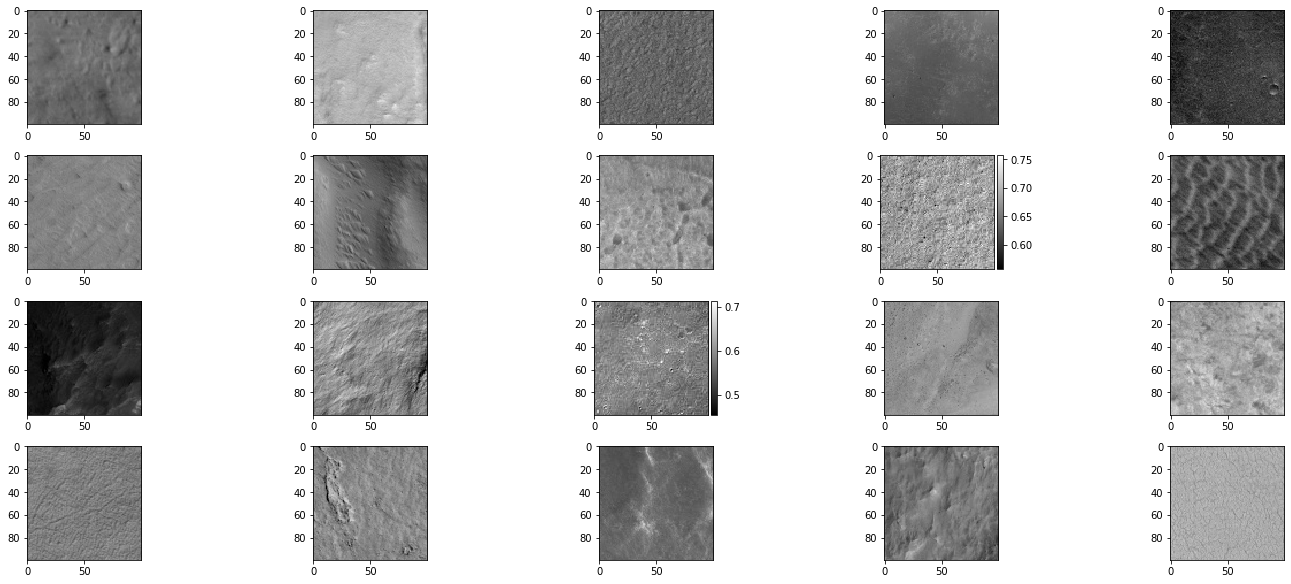

In [ ]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_train):
  plt.subplot(len(pil_arr_train) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

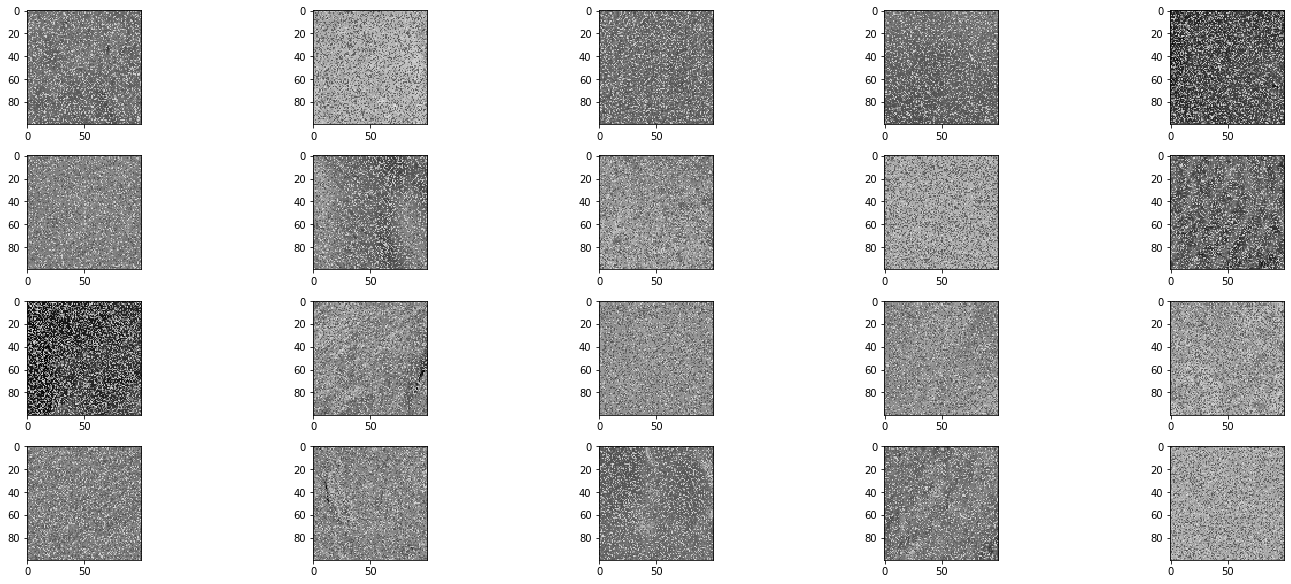

In [ ]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_Noisy):
  plt.subplot(len(pil_arr_Noisy) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

In [ ]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr):
  plt.subplot(len(pil_arr) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

<Figure size 1440x720 with 0 Axes>

In [ ]:
import cv2
from skimage import img_as_ubyte

XtrainRs = []

for i in range(len(Xtrain)):
  res = cv2.resize(Xtrain[i], dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
  XtrainRs.append(res)

NoisyXrs= []

for x in XtrainRs:
  img = img_as_ubyte(x)
  img = add_noise_prm(img,3000,4000)
  NoisyXrs.append(img)

X_trainRs = np.array(XtrainRs)
NoisyXrs = np.array(NoisyXrs)
X_trainRs = X_trainRs.reshape(len(X_trainRs),128,128,1)
NoisyXrs = NoisyXrs.reshape(len(NoisyXrs),128,128,1)
X_trainRs.shape

(4961, 128, 128, 1)

In [ ]:
input = layers.Input(shape=(128, 128, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder_rs = Model(input, x)
autoencoder_rs.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder_rs.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248  

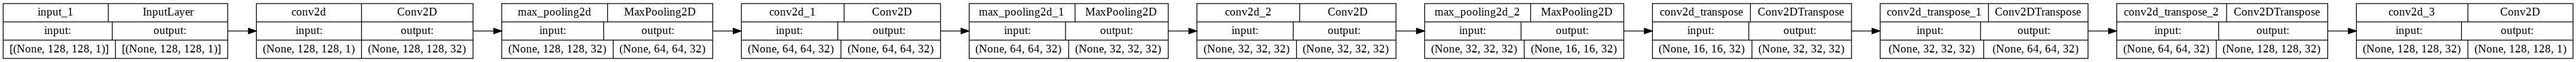

In [ ]:
tf.keras.utils.plot_model(
    autoencoder_rs,
    to_file='aers.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='LR',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [ ]:
autoencoder_rs.fit(
    x=NoisyXrs,
    y=X_trainRs,
    epochs=250,
    batch_size=64,
    shuffle=True
)

Epoch 1/250
78/78 [==============================] - 6s 61ms/step - loss: 0.6481
Epoch 2/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6287
Epoch 3/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6250
Epoch 4/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6244
Epoch 5/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6242
Epoch 6/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6238
Epoch 7/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6239
Epoch 8/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6233
Epoch 9/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6231
Epoch 10/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6228
Epoch 11/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6226
Epoch 12/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6224
Epoch 13/250
78/78 [=====

156/156 [==============================] - 2s 13ms/step


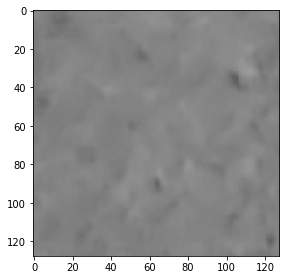

In [ ]:
predictions_xrs = autoencoder_rs.predict(NoisyXrs)
preds_xrs = predictions_xrs[5].reshape(128,128)
io.imshow(preds_xrs, cmap='gray')

In [ ]:
predictions_xrs.shape, X_trainRs.shape

((4961, 128, 128, 1), (4961, 128, 128, 1))

In [ ]:
from PIL import Image
pil_arr_rs = []
for x in predictions_xrs:
  v = x.reshape(128,128)
  pil_arr_rs.append(v)


from PIL import Image
pil_arr_train_xrs = []
for x in XtrainRs:
  v = x.reshape(128,128)
  pil_arr_train_xrs.append(v)


from PIL import Image
pil_arr_noise_xrs = []
for x in NoisyXrs:
  v = x.reshape(128,128)
  pil_arr_noise_xrs.append(v)

pil_arr_xrs = pil_arr_rs[0:20]
pil_arr_train_xrs = pil_arr_train_xrs[0:20]
pil_arr_noise_xrs = pil_arr_noise_xrs[0:20]

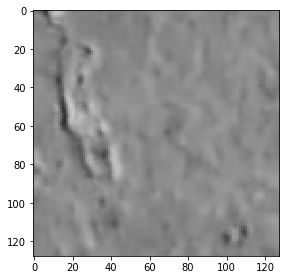

In [ ]:
i = io.imshow(pil_arr_xrs[16],cmap='gray')
io.imsave('i6.png',pil_arr_noise_xrs[16])

In [ ]:
!pwd

/content/dataset/rdr_nomap_browse


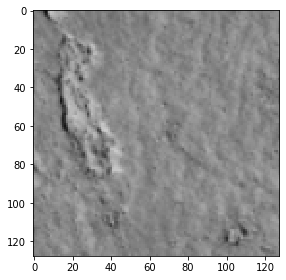

In [ ]:
io.imshow(pil_arr_train_xrs[16],cmap='gray')

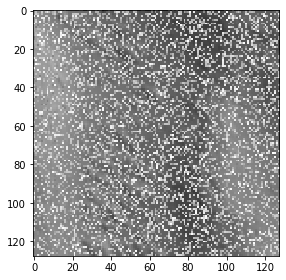

In [ ]:
io.imshow(pil_arr_noise_xrs[6],cmap='gray')

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


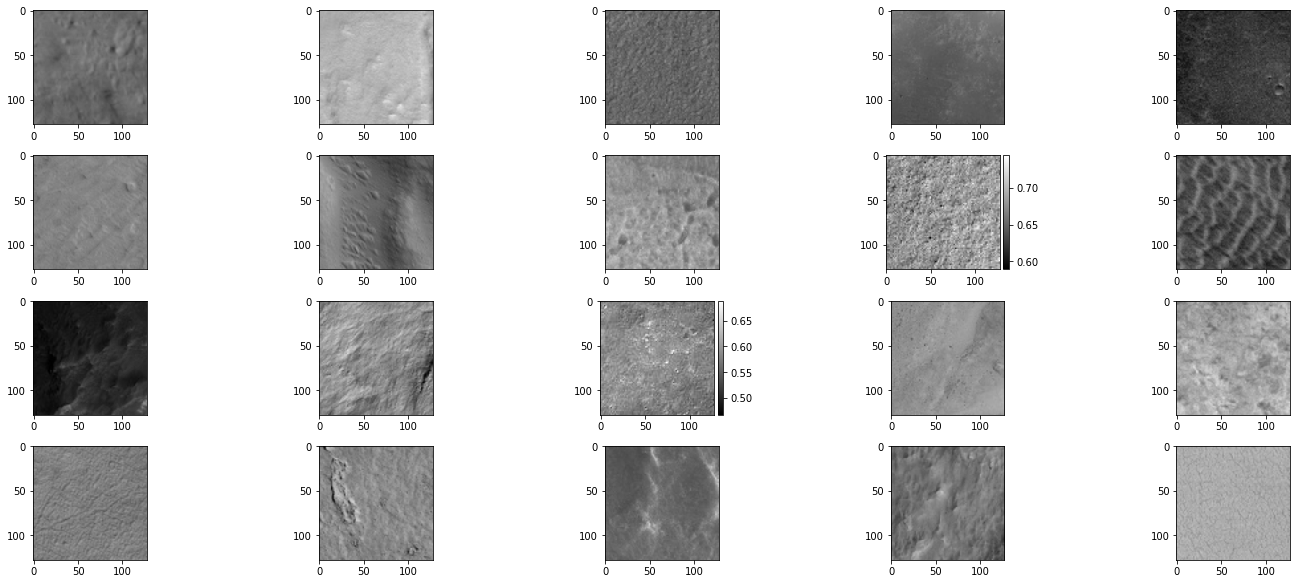

In [ ]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_train_xrs):
  plt.subplot(len(pil_arr_train_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

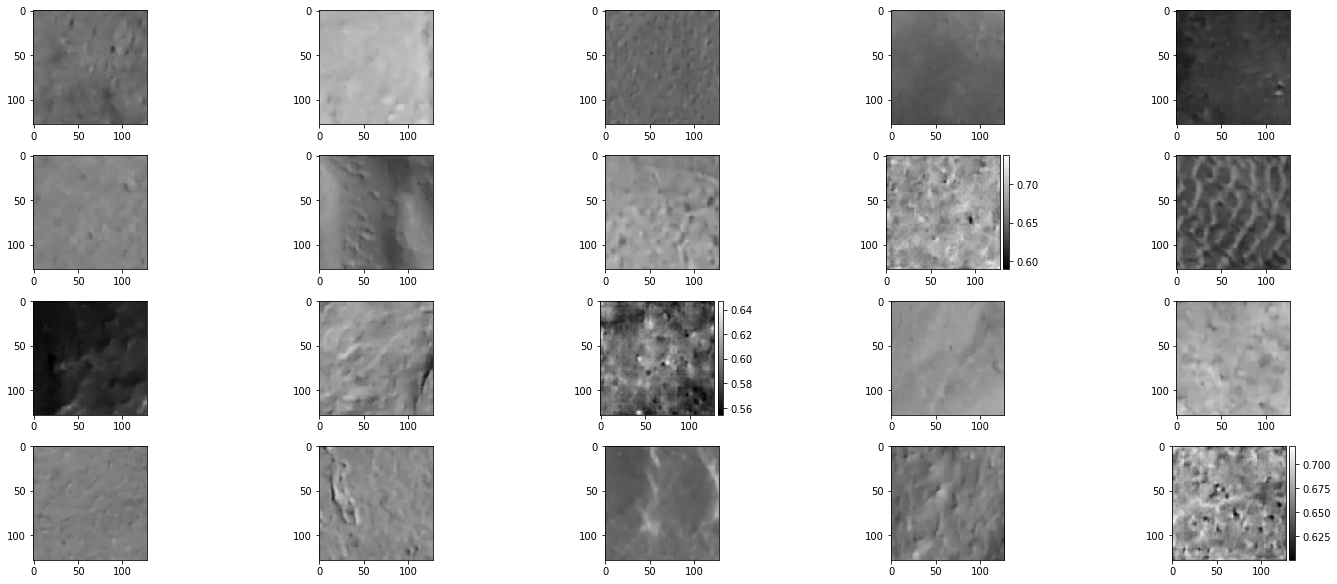

In [ ]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_xrs):
  plt.subplot(len(pil_arr_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

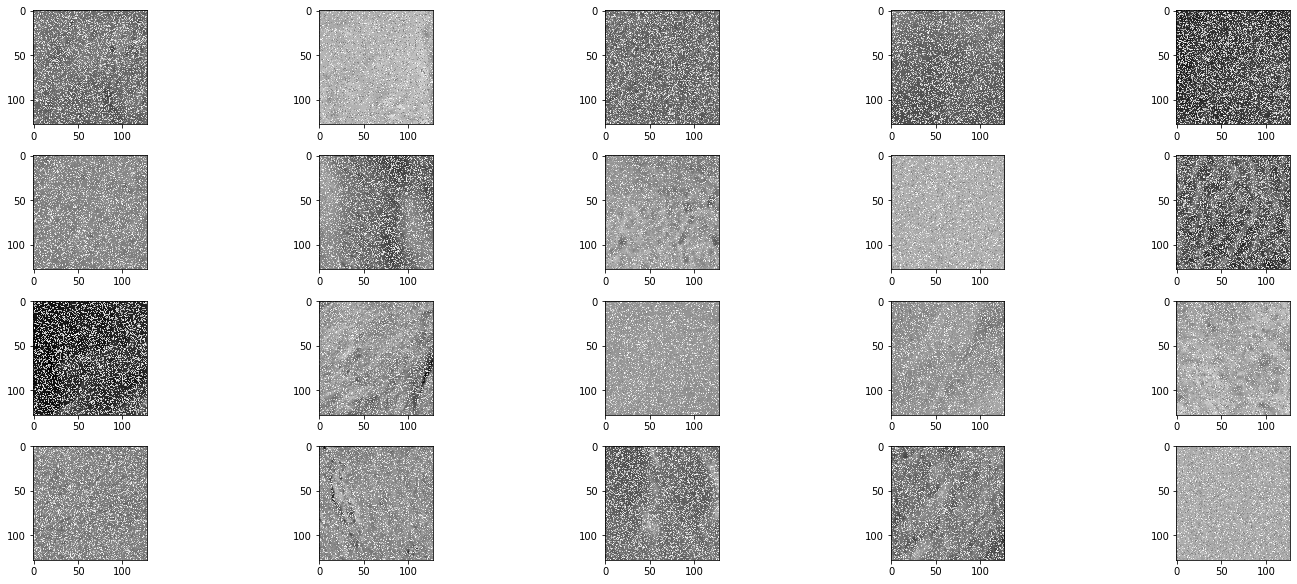

In [ ]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_noise_xrs):
  plt.subplot(len(pil_arr_noise_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

In [ ]:
# arr1 = pil_arr_train_xrs
# arr2 = pil_arr_xrs
predictions_xrs.dtype, X_trainRs.dtype

(dtype('float32'), dtype('float64'))

In [ ]:
predictions_xrs.shape, X_trainRs.shape

((4961, 128, 128, 1), (4961, 128, 128, 1))

In [ ]:
Xt = X_trainRs.astype(np.float32)

In [ ]:
Xt[0], predictions_xrs[0]

(array([[[0.44705883],
         [0.42861518],
         [0.42493874],
         ...,
         [0.4345588 ],
         [0.42487746],
         [0.41960785]],
 
        [[0.43915442],
         [0.42248103],
         [0.4184752 ],
         ...,
         [0.41706207],
         [0.40379903],
         [0.3985294 ]],
 
        [[0.43529412],
         [0.42306697],
         [0.41984433],
         ...,
         [0.3918859 ],
         [0.38162148],
         [0.38112745]],
 
        ...,
 
        [[0.43351716],
         [0.45772442],
         [0.4687414 ],
         ...,
         [0.4352252 ],
         [0.43280962],
         [0.42922795]],
 
        [[0.43400735],
         [0.46644837],
         [0.47937635],
         ...,
         [0.4312816 ],
         [0.42527956],
         [0.42873776]],
 
        [[0.43137255],
         [0.4708946 ],
         [0.48131126],
         ...,
         [0.42457107],
         [0.42083332],
         [0.43137255]]], dtype=float32), array([[[0.43049568],
         [0.428465

In [ ]:
ssim = tf.image.ssim(
    predictions_xrs,
    Xt,
    max_val=1.0,
    filter_size=11,
    filter_sigma=1.5,
    k1=0.01,
    k2=0.03
)

In [ ]:
ssim

<tf.Tensor: shape=(4961,), dtype=float32, numpy=
array([0.9056662 , 0.80640596, 0.63758266, ..., 0.77376014, 0.6023191 ,
       0.39712507], dtype=float32)>

In [ ]:
mean_ssim = tf.reduce_mean(ssim)

In [ ]:
mean_ssim.numpy()

0.7573066

In [ ]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(Xt, predictions_xrs).numpy()

0.022845278

In [ ]:
psnr = tf.image.psnr(Xt, predictions_xrs, max_val=1.0)

In [ ]:
psnr.numpy().mean()

31.497534

In [ ]:
# mssim =tf.image.ssim_multiscale(
#     predictions_xrs,
#     Xt,
#     max_val=1.0,
#     filter_size=11,
#     filter_sigma=1.5,
#     k1=0.01,
#     k2=0.03
# )

ms_ssim_score = tf.image.ssim_multiscale(img1=predictions_xrs, img2=Xt, max_val=1.0,
                                         power_factors=(0.0448, 0.2856, 0.3001),
                                         filter_size=11)

In [ ]:
ms_ssim_score.numpy().mean()

0.9211203